In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model('model_18.3a.h5')
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0

In [4]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
X_test, y_test = test
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


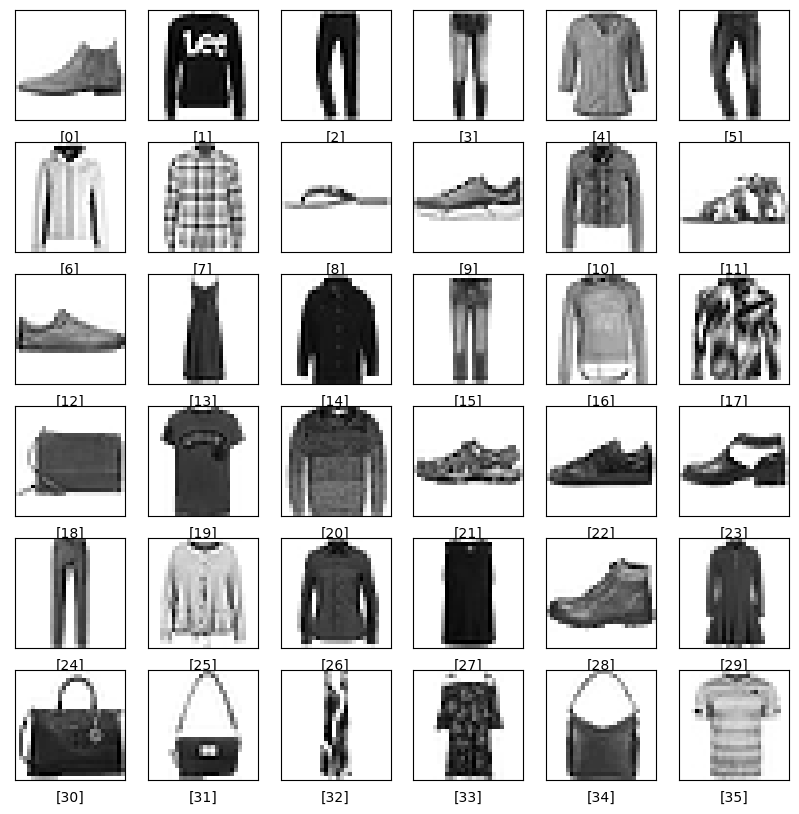

In [5]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel([i])

plt.show()

In [6]:
dataset = list(range(0,36))

# "interfejs"

In [7]:
def jaki_to_ciuch():
    no_img = int(input("Które zdjęcie chciałbyś zidentyfikować? Poproszę o liczbę z zakresu 0-35."))
    while no_img not in dataset:
        no_img = int(input("Poproszę o liczbę z zakresu 0-35."))
    klasa = np.argmax(y_pred[no_img])
    print("klasa :",class_names[klasa])
    print("(dla pewności: rzeczywista klasa to", class_names[y_test[no_img]],")")


In [9]:
jaki_to_ciuch()

Które zdjęcie chciałbyś zidentyfikować? Poproszę o liczbę z zakresu 0-35.25
klasa : Shirt
(dla pewności: rzeczywista klasa to Coat )


# Wnioski

Model z butami i spodniami daje sobie radę. Trudniej z sukienkami/torebkami (podobny kształt). Bluzy i kurtki też nie są oczywiste.

Ogólnie zastanawiam się nad celowością zapisywania modeli w tensorflow. Model przed zapisaniem miał accuracy ~.93. Po załadowaniu go w osobnym pliku ma accuracy ~.80.

Ten sam efekt jest na tutorialu w tensorflow: u nich model przed zapisem ma accuracy ~.96, a po załadowaniu zapisanego modelu ma ~.86 (https://www.tensorflow.org/tutorials/keras/save_and_load).